In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cross_entropy(Y_true, predictions):
  filter_true_1 = Y_true == 1
  return -1 * ( np.sum(np.log(predictions[filter_true_1])) + np.sum(np.log(1 - predictions[~filter_true_1])) )

def gradient_descent_step(df, x, step_size):
  return x - step_size * df(x)

def gradient_descent(f, df, x0, step_size, numer_of_steps, treshold=None, should_trace_steps=None, should_plot=False):
  x = x0
  
  if (should_trace_steps is not None):
    print(f'Step 0. Starting point is {x0} and initial function value is {f(x0)}')
  
  if (should_plot):
    steps_hist = [0]
    f_hist = [f(x0)]

  for step in range(numer_of_steps):
    x_new = gradient_descent_step(df, x, step_size)
    f_new = f(x_new)
    if (should_trace_steps is not None):
      if ((step+1) % should_trace_steps == 0):
        print(f'Step {step+1}. At {x_new} function value is {f_new}')
    
    if (should_plot):
      steps_hist.append(step+1)
      f_hist.append(f_new)
    
    if (treshold is not None):
      change = np.abs(f_new - f(x))
      if (change < treshold):
        print(f'Early stop after {step+1} steps because change in step {change} is smaller than treshold {treshold}')
        x = x_new 
        break
   
    x = x_new 


  if (should_trace_steps is not None):
    print(f'Loop finished with trained parameters at {x} and function value is {f(x)}')
  
  if (should_plot):
    plt.figure(figsize=(20,10))
    plt.plot(steps_hist, f_hist);
    plt.title('Cost fuction history');

  return x

In [ ]:
N = 100
D = 2

X = np.random.randn(N, D)
X[:N//2] -= 2
X[N//2:] += 2

y = np.zeros(N)
y[N//2:] = 1

w0 = np.random.randn(D + 1)
print('Randomly generated initial values for weights:', w0)

Randomly generated initial values for weights: [ 0.29617691 -0.4655013   0.23802218]


In [ ]:
Xb = np.concatenate((np.ones((N,1)), X), axis=1)
print('Xb:', Xb[:3])
print('w:', w0[:3])

z0 = Xb.dot(w0)
print('Xb * w', z0[:3])

out0 = sigmoid(z0)
print('Neutor output with sigmoid:', out0[:3])

L0 = cross_entropy(y, out0)
print('Cross Enthropy loss:', L0)

print('Lets calculate cross enthropy with W weights calculated from LDA clossed form solution that is [0, 4, 4]')
w_lda = np.array([0, 4, 4])
z_lda = Xb.dot(w_lda)
y_pred_lda = sigmoid(z_lda)
L_lda = cross_entropy(y, y_pred_lda)
print('Cross Enthropy loss for W weights calculated from LDA clossed form solution:', L_lda)

Xb: [[ 1.         -2.52795718 -1.65962373]
 [ 1.         -3.71754872 -1.17205825]
 [ 1.         -1.86307444 -2.97373533]]
w: [ 0.29617691 -0.4655013   0.23802218]
Xb * w [1.077917   1.74772481 0.45562551]
Neutor output with sigmoid: [0.74609959 0.8516656  0.61197591]
Cross Enthropy loss: 99.85898920121878
Lets calculate cross enthropy with W weights calculated from LDA clossed form solution that is [0, 4, 4]
Cross Enthropy loss for W weights calculated from LDA clossed form solution: 2.989400447465919


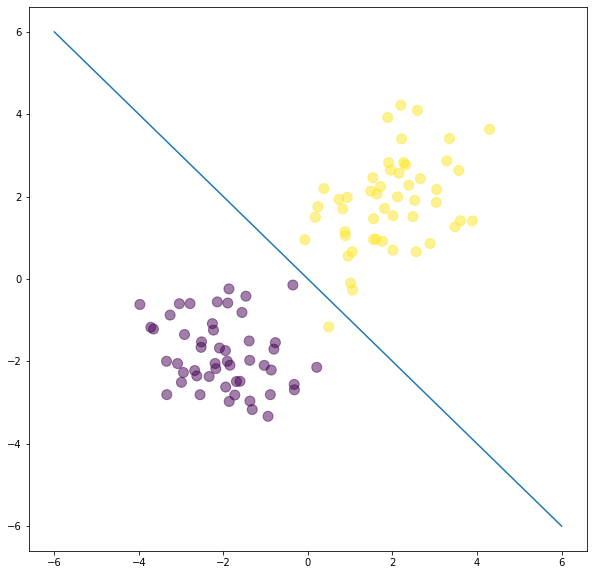

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.5);

x_axis = np.linspace(-6, 6, 1000)
y_axis = -1 * x_axis
plt.plot(x_axis, y_axis);

Initial value for trained weigths: [ 0.29617691 -0.4655013   0.23802218]
Step 0. Starting point is [ 0.29617691 -0.4655013   0.23802218] and initial function value is 99.85898920121878
Step 1. At [-0.40040312 12.48739048 11.12192744] function value is 7.221871924823975
Step 2. At [-0.30061325 12.53649007 11.00563164] function value is 6.96297262749037
Step 3. At [-0.20086203 12.58558352 10.88936376] function value is 6.704229963170627
Step 4. At [-0.1011573  12.63466848 10.77313144] function value is 6.445681978862722
Step 5. At [-1.50896864e-03  1.26837417e+01  1.06569445e+01] function value is 6.1873774868853
Step 6. At [ 0.09807042 12.73279888 10.54081565] function value is 5.9293790382792695
Step 7. At [ 0.197565   12.78183407 10.42476118] function value is 5.671766714361873
Step 8. At [ 0.29695468 12.83083957 10.30880213] function value is 5.414642935502723
Step 9. At [ 0.396214   12.87980517 10.19296548] function value is 5.15813851912196
Step 10. At [ 0.49531068 12.92871755 10.0

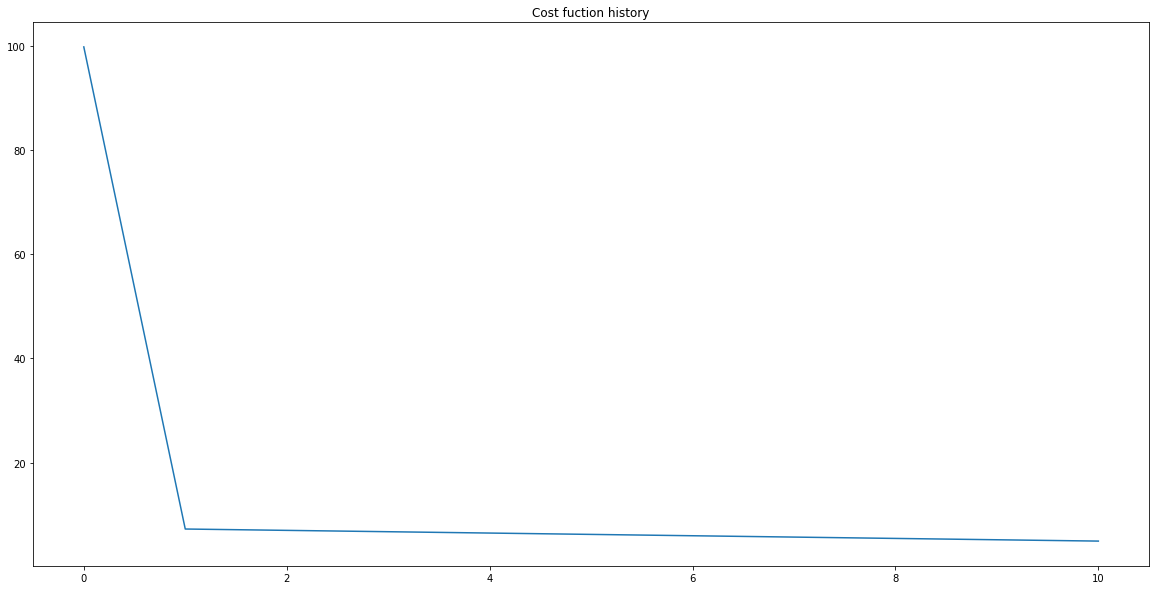

In [ ]:
cost = lambda  w: cross_entropy(y, sigmoid(Xb.dot(w)))
dcost = lambda  w: -1 * Xb.T.dot(y - sigmoid(Xb.dot(w)))

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=10, treshold=None, should_trace_steps=1, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(y, y_pred_gd)
print('Cross Enthropy loss for W weights calculated bu gradient descent:', L_gd)

# L2 Regularization

Initial value for trained weigths: [ 0.29617691 -0.4655013   0.23802218]
Step 0. Starting point is [ 0.29617691 -0.4655013   0.23802218] and initial function value is 99.89509587927189
Step 1. At [-0.40336489 12.49204549 11.11954722] function value is 35.20559721352004
Step 2. At [-0.29954084 12.4162243  10.89205608] function value is 34.17782384324681
Step 3. At [-0.19681047 12.34115625 10.66687848] function value is 33.17411543756809
Step 4. At [-0.09517797 12.26683016 10.4440046 ] function value is 32.1940538722292
Step 5. At [5.34802216e-03 1.21932333e+01 1.02234293e+01] function value is 31.237257714520215
Step 6. At [ 0.10475307 12.12035075 10.00515359] function value is 30.303389694617387
Step 7. At [ 0.20301525 12.0481648   9.78918652] function value is 29.392166169503923
Step 8. At [ 0.30010298 11.9766538   9.57554762] function value is 28.503368919305544
Step 9. At [ 0.39597226 11.90579094  9.36427   ] function value is 27.636859550162626
Step 10. At [ 0.49056329 11.8355427  

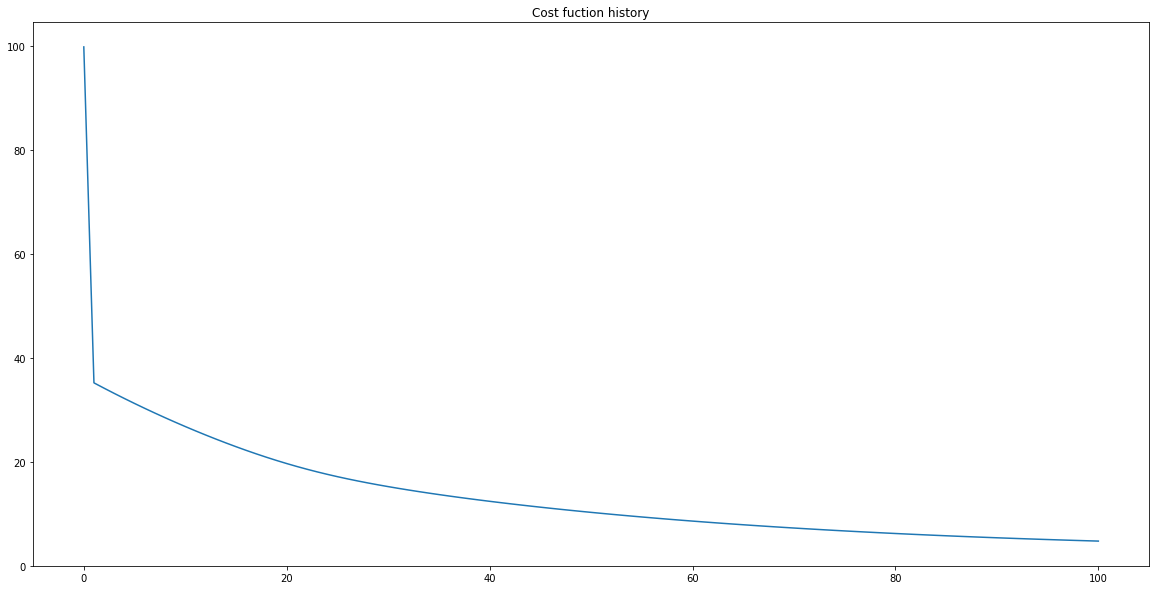

In [ ]:
alfa = 0.1

cost = lambda  w: cross_entropy(y, sigmoid(Xb.dot(w))) + alfa * w.dot(w)
dcost = lambda  w: -1 * Xb.T.dot(y - sigmoid(Xb.dot(w))) + 2 * alfa * w

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=100, treshold=None, should_trace_steps=1, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(y, y_pred_gd)
print('Cross Enthropy loss for W weights calculated bu gradient descent:', L_gd)

# L1 Regularization

In [ ]:
N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10
# X = (np.random.randn(N, D) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

# let's plot the data to see what it looks like
plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

<Figure size 720x720 with 0 Axes>

[ 1.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Initial value for trained weigths: [ 0.15204484 -0.40526344 -0.04899426  0.02530638  0.06489535 -0.0733335
 -0.04127773  0.24251632  0.06504167  0.01864761 -0.07290523  0.25249628
  0.15410783 -0.19772371  0.0860517   0.01847092  0.19292315 -0.35503566
 -0.0060275   0.01794387  0.03143391  0.0760437  -0.12282967 -0.09937715
 -0.0629157   0.02545197  0.38138688  0.19665825  0.22946985 -0.13850895
  0.15859091 -0.01567606  0.11467877  0.1573346  -0.0905022   0.10618194
  0.04471071 -0.2542082   0.23646353  0.15863297 -0.03906438 -0.03331703
  0.14883125 -0.14714593  0.07312092  0.09516625 -0.04286965 -0.17029532
  0.10347109 -0.2635872 ]
Cross Enthropy loss for W weights calculated by gradient descent: 1.5963074756866162


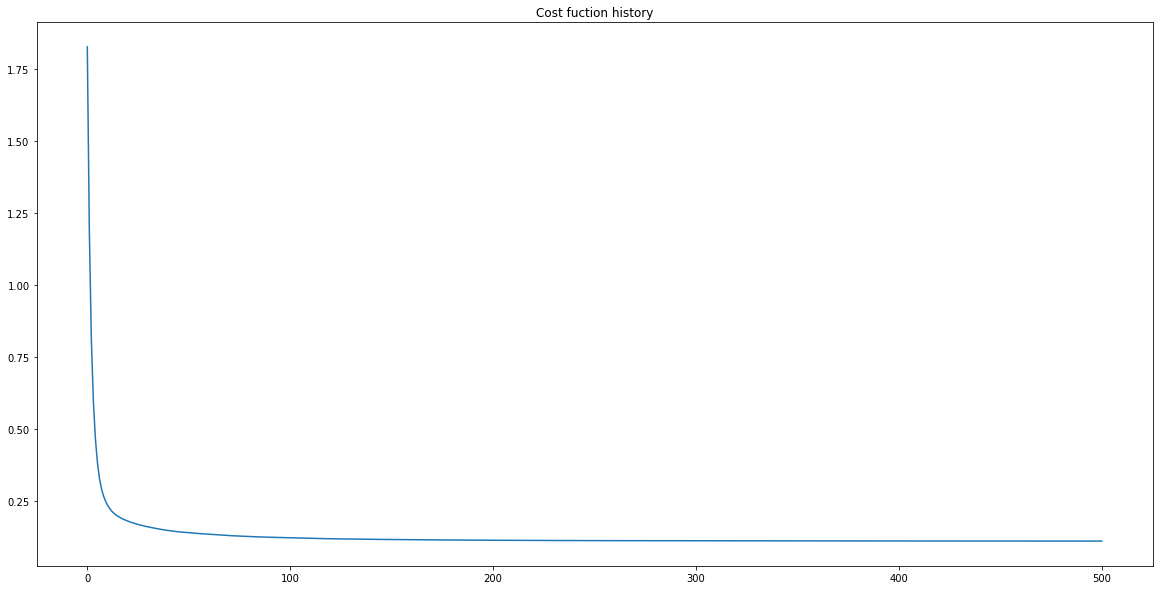

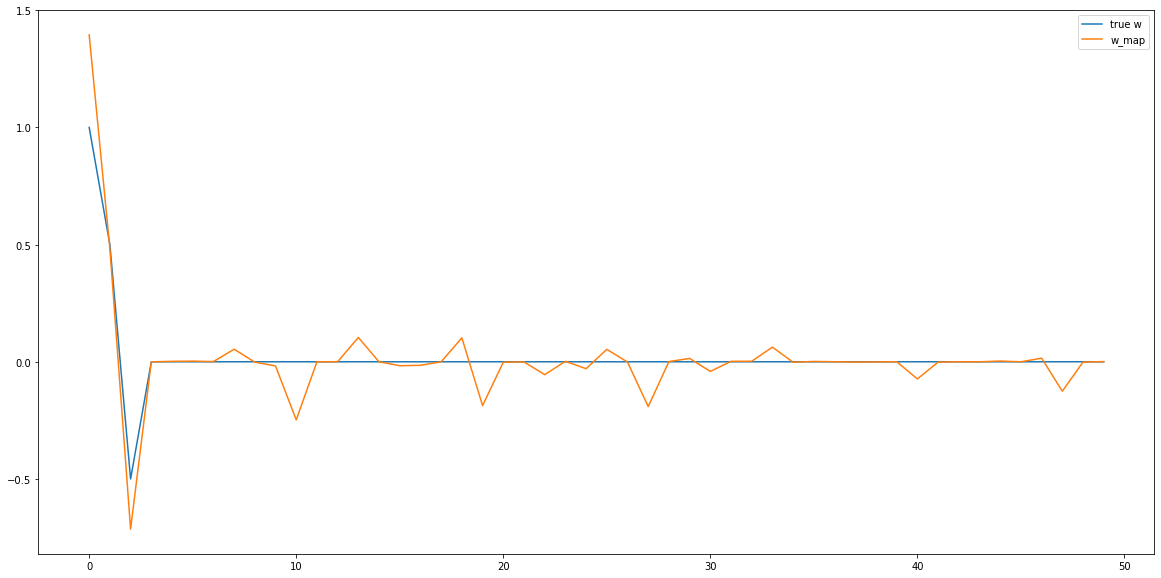

In [ ]:
alfa = 1.0

print( np.sign(true_w))

cost = lambda  w: ( cross_entropy(Y, sigmoid(X.dot(w))) + alfa * (np.abs(w)).sum() ) / len(Y)
dcost = lambda  w: ( -1 * X.T.dot(Y - sigmoid(X.dot(w))) + 2 * alfa * np.sign(w) ) / len(Y)

w0 = np.random.randn(D) / np.sqrt(D)
print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=500, treshold=None, should_trace_steps=None, should_plot=True)

z_gd = X.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(Y, y_pred_gd)
print('Cross Enthropy loss for W weights calculated by gradient descent:', L_gd)

# plot our w vs true w
plt.figure(figsize=(20,10))
plt.plot(true_w, label='true w')
plt.plot(w_gd, label='w_map')
plt.legend()
plt.show()